In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

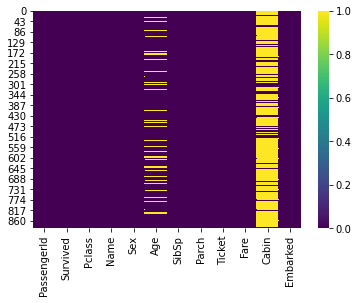

In [4]:
sns.heatmap(data.isnull(),cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

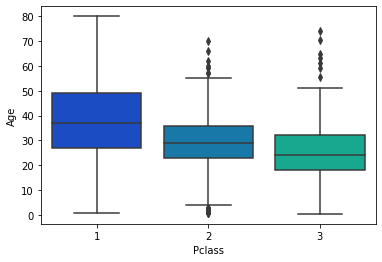

In [5]:
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [7]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

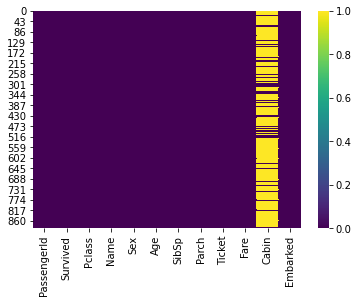

In [8]:
sns.heatmap(data.isnull(),cmap='viridis')

In [9]:
data.drop('Cabin',axis=1,inplace=True)

In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [12]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

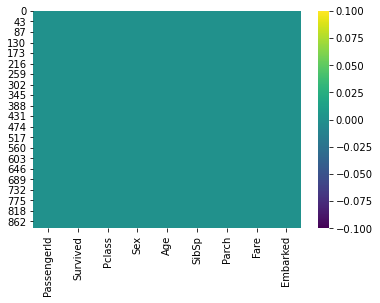

In [14]:
sns.heatmap(data.isnull(),cmap='viridis')

In [15]:
t1=pd.get_dummies(data,drop_first=True)

In [16]:
t1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


t1.info()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(t1.drop('Survived',axis=1), 
                                                    t1['Survived'], test_size=0.20, 
                                                    random_state=101)

In [19]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
307,308,1,17.0,1,0,108.9000,0,0,0
229,230,3,24.0,3,1,25.4667,0,0,1
82,83,3,24.0,0,0,7.7875,0,1,0
353,354,3,25.0,1,0,17.8000,1,0,1
707,708,1,42.0,0,0,26.2875,1,0,1


# LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\preet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions=logmodel.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print (confusion_matrix (y_test, predictions))

[[98  9]
 [26 45]]


In [25]:
print (classification_report (y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       107
           1       0.83      0.63      0.72        71

    accuracy                           0.80       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.81      0.80      0.80       178



In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8033707865168539

# KNN MODEL

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(t1.drop('Survived',axis=1))

StandardScaler()

In [30]:
scaled_features = scaler.transform(t1.drop('Survived',axis=1))

In [31]:
tn = pd.DataFrame(scaled_features,columns=t1.columns[:-1])
tn.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q
0,-1.732505,0.825209,-0.531670,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794
1,-1.728611,-1.572211,0.680232,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287
2,-1.724718,0.825209,-0.228695,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794
3,-1.720825,-1.572211,0.453001,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794
4,-1.716931,0.825209,0.453001,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(t1.drop('Survived', axis=1),t1['Survived'], test_size=0.30)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=39)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=39)

In [37]:
pred = knn.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(confusion_matrix(y_test,pred))

[[158   4]
 [ 84  21]]


In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       162
           1       0.84      0.20      0.32       105

    accuracy                           0.67       267
   macro avg       0.75      0.59      0.55       267
weighted avg       0.73      0.67      0.60       267



In [41]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

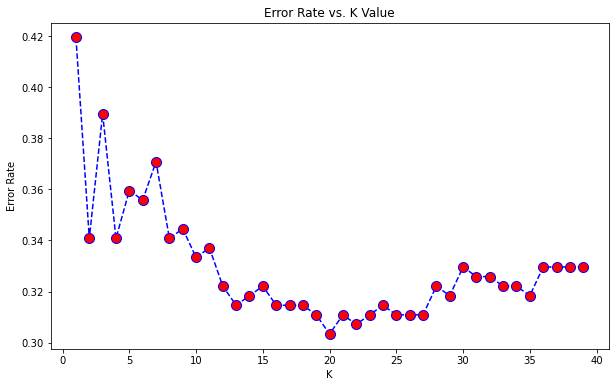

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
error_rate

[0.41947565543071164,
 0.3408239700374532,
 0.3895131086142322,
 0.3408239700374532,
 0.3595505617977528,
 0.35580524344569286,
 0.3707865168539326,
 0.3408239700374532,
 0.3445692883895131,
 0.3333333333333333,
 0.33707865168539325,
 0.32209737827715357,
 0.3146067415730337,
 0.31835205992509363,
 0.32209737827715357,
 0.3146067415730337,
 0.3146067415730337,
 0.3146067415730337,
 0.31086142322097376,
 0.30337078651685395,
 0.31086142322097376,
 0.30711610486891383,
 0.31086142322097376,
 0.3146067415730337,
 0.31086142322097376,
 0.31086142322097376,
 0.31086142322097376,
 0.32209737827715357,
 0.31835205992509363,
 0.3295880149812734,
 0.3258426966292135,
 0.3258426966292135,
 0.32209737827715357,
 0.32209737827715357,
 0.31835205992509363,
 0.3295880149812734,
 0.3295880149812734,
 0.3295880149812734,
 0.3295880149812734]

In [44]:
probabilities=knn.predict_proba(X_test)[:,1]
probabilities

array([0.43589744, 0.17948718, 0.61538462, 0.28205128, 0.69230769,
       0.28205128, 0.28205128, 0.28205128, 0.20512821, 0.28205128,
       0.35897436, 0.35897436, 0.35897436, 0.23076923, 0.30769231,
       0.33333333, 0.25641026, 0.23076923, 0.20512821, 0.30769231,
       0.33333333, 0.33333333, 0.56410256, 0.64102564, 0.38461538,
       0.30769231, 0.25641026, 0.38461538, 0.41025641, 0.48717949,
       0.38461538, 0.74358974, 0.33333333, 0.46153846, 0.30769231,
       0.17948718, 0.33333333, 0.30769231, 0.48717949, 0.35897436,
       0.38461538, 0.38461538, 0.33333333, 0.35897436, 0.38461538,
       0.30769231, 0.20512821, 0.69230769, 0.33333333, 0.28205128,
       0.64102564, 0.43589744, 0.38461538, 0.30769231, 0.30769231,
       0.15384615, 0.38461538, 0.35897436, 0.69230769, 0.33333333,
       0.25641026, 0.30769231, 0.41025641, 0.35897436, 0.38461538,
       0.35897436, 0.28205128, 0.23076923, 0.35897436, 0.48717949,
       0.33333333, 0.41025641, 0.23076923, 0.25641026, 0.30769

# SVM

In [45]:
t1.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [46]:

from sklearn.svm import SVC

In [47]:
model = SVC()

In [48]:
model.fit(X_train,y_train)

SVC()

In [49]:
predictions = model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(confusion_matrix(y_test,predictions))

[[158   4]
 [ 91  14]]


In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77       162
           1       0.78      0.13      0.23       105

    accuracy                           0.64       267
   macro avg       0.71      0.55      0.50       267
weighted avg       0.69      0.64      0.56       267



In [53]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [56]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.664, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.600, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.694, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.653, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.653, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.664, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.640, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.774, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.0s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [57]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [58]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [59]:
grid_predictions = grid.predict(X_test)

In [60]:
print(confusion_matrix(y_test,grid_predictions))

[[131  31]
 [ 43  62]]


In [61]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       162
           1       0.67      0.59      0.63       105

    accuracy                           0.72       267
   macro avg       0.71      0.70      0.70       267
weighted avg       0.72      0.72      0.72       267



# Decision tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dtree = DecisionTreeClassifier()

In [64]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
predictions = dtree.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       162
           1       0.67      0.69      0.68       105

    accuracy                           0.75       267
   macro avg       0.73      0.73      0.73       267
weighted avg       0.75      0.75      0.75       267



In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7453183520599251

# Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
rfc_pred = rfc.predict(X_test)

In [71]:
print(confusion_matrix(y_test,rfc_pred))

[[149  13]
 [ 28  77]]


In [72]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       162
           1       0.86      0.73      0.79       105

    accuracy                           0.85       267
   macro avg       0.85      0.83      0.83       267
weighted avg       0.85      0.85      0.84       267



# To be Predicted Dataset

In [73]:
tobe=pd.read_csv('test.csv')

In [74]:
tobe

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:>

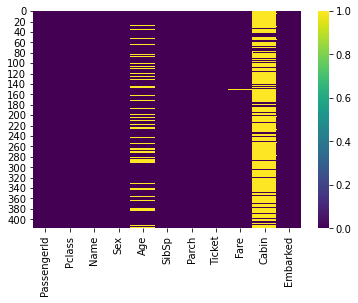

In [75]:
sns.heatmap(tobe.isnull(), cmap='viridis')

In [76]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [77]:
tobe['Age'] = tobe[['Age','Pclass']].apply(impute_age,axis=1)

In [78]:
tobe.drop('Cabin',axis=1,inplace=True)

In [79]:
tobe.dropna(inplace=True)


In [80]:
tobe.drop(['Name','Ticket'],axis=1,inplace=True)

<AxesSubplot:>

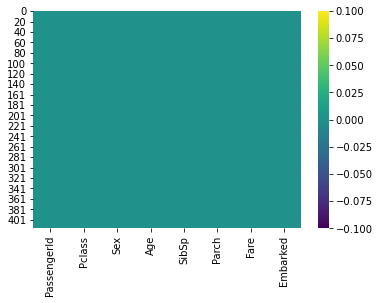

In [81]:
sns.heatmap(tobe.isnull(),cmap='viridis')

In [82]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
607,608,1,27.0,0,0,30.5000,1,0,1
495,496,3,24.0,0,0,14.4583,1,0,0
777,778,3,5.0,0,0,12.4750,0,0,1
146,147,3,27.0,0,0,7.7958,1,0,1
640,641,3,20.0,0,0,7.8542,1,0,1


In [83]:
tobe.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [84]:
tobe1=pd.get_dummies(tobe,drop_first=True)

In [85]:
tobe1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,24.0,0,0,8.0500,1,0,1


In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_pred_random_forest=clf.predict(tobe1)
acc_random_forest=round(clf.score(X_train,y_train)*1000,2)
print(acc_random_forest)

1000.0


In [88]:
submission=pd.DataFrame({"PassengerId":tobe1["PassengerId"],
                        "Survived":y_pred_random_forest})

In [89]:
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[417 rows x 2 columns]


In [90]:
pd.DataFrame({"PassengerId":tobe1["PassengerId"],
                        "Survived":y_pred_random_forest}).to_csv('Final_Predicted.csv')